In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('../data/zillow_data.csv')

In [40]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [41]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [42]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [43]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [44]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [45]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [46]:
lake_worth = df.loc[df['zipcode'] == '33705']

In [47]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,54600.0,54800.0,55000.0,...,154700,158900,162500,165300,167100,168200,171100,175100,177300,159.210526


In [48]:
lake_worth = lake_worth.iloc[:,7:-1]

In [49]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2661,54600.0,54800.0,55000.0,55200.0,55400.0,55600.0,55900.0,56300.0,56700.0,57100.0,...,150500,154700,158900,162500,165300,167100,168200,171100,175100,177300


In [50]:
lake_worth = lake_worth.T

In [51]:
lake_worth.head()

,2661
1996-04,54600.0
1996-05,54800.0
1996-06,55000.0
1996-07,55200.0
1996-08,55400.0


In [52]:
type(lake_worth)

pandas.core.frame.DataFrame

In [53]:
lake_worth = lake_worth.rename(columns={2661:'home price'})

In [54]:
lake_worth.head()

,home price
1996-04,54600.0
1996-05,54800.0
1996-06,55000.0
1996-07,55200.0
1996-08,55400.0


In [55]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [56]:
lake_worth.index.dtype

dtype('<M8[ns]')

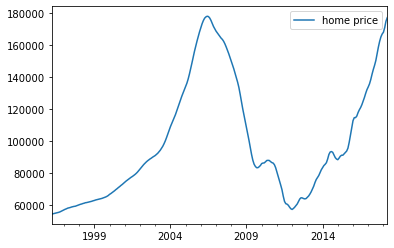

In [57]:
lake_worth.plot();

In [58]:
lake_worth['diff'] = lake_worth.diff()

In [59]:
lake_worth.head()

,home price,diff
1996-04-01,54600.0,NaN
1996-05-01,54800.0,200.0
1996-06-01,55000.0,200.0
1996-07-01,55200.0,200.0
1996-08-01,55400.0,200.0


In [60]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [61]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,167100.0,1800.0,165300.0
2018-01-01,168200.0,1100.0,167100.0
2018-02-01,171100.0,2900.0,168200.0
2018-03-01,175100.0,4000.0,171100.0
2018-04-01,177300.0,2200.0,175100.0


In [62]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [63]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,54600.0,NaN,NaN,NaN
1996-05-01,54800.0,200.0,54600.0,0.003663
1996-06-01,55000.0,200.0,54800.0,0.003650
1996-07-01,55200.0,200.0,55000.0,0.003636
1996-08-01,55400.0,200.0,55200.0,0.003623


In [64]:
lake_worth = lake_worth.dropna()

In [65]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-05-01,54800.0,200.0,54600.0,0.003663
1996-06-01,55000.0,200.0,54800.0,0.003650
1996-07-01,55200.0,200.0,55000.0,0.003636
1996-08-01,55400.0,200.0,55200.0,0.003623
1996-09-01,55600.0,200.0,55400.0,0.003610


In [66]:
lake_worth_pct = lake_worth.drop(['pct','diff','home price shifted'],axis=1)

In [67]:
lake_worth_pct.head()

,home price
1996-05-01,54800.0
1996-06-01,55000.0
1996-07-01,55200.0
1996-08-01,55400.0
1996-09-01,55600.0


In [68]:
lake_worth_pct = lake_worth_pct['2013-04':]

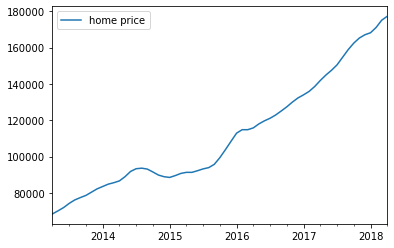

In [69]:
lake_worth_pct.plot();

In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
adfuller(lake_worth_pct)

(1.0776215285693784,
 0.9950210325746934,
 8,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 786.4251265940411)

In [72]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [73]:
cutoff = '2017-05'
train = lake_worth_pct[:cutoff]
test = lake_worth_pct[cutoff:]

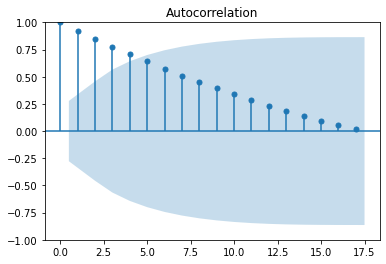

In [74]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

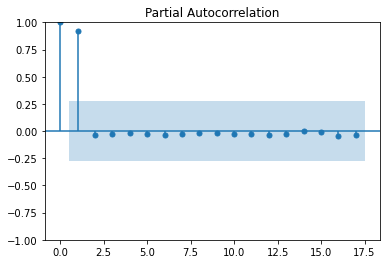

In [75]:
plot_pacf(train,method='ywm');

In [76]:
ar_1 = ARIMA(train, order=(0, 2, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

11340.157390819606

In [78]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             home price   No. Observations:                   50
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -391.426
Date:                Thu, 30 Mar 2023   AIC                            784.853
Time:                        11:16:03   BIC                            786.724
Sample:                    04-01-2013   HQIC                           785.560
                         - 05-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       7.08e+05    1.2e+05      5.897      0.000    4.73e+05    9.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   7.06   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.01   Prob(JB):                         0.12
Heteroskedasticity (H):               1.95   Skew:                            -0.56
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

In [96]:
np.sqrt(mean_squared_error(test, y_pred_out))

2748.4844308576075

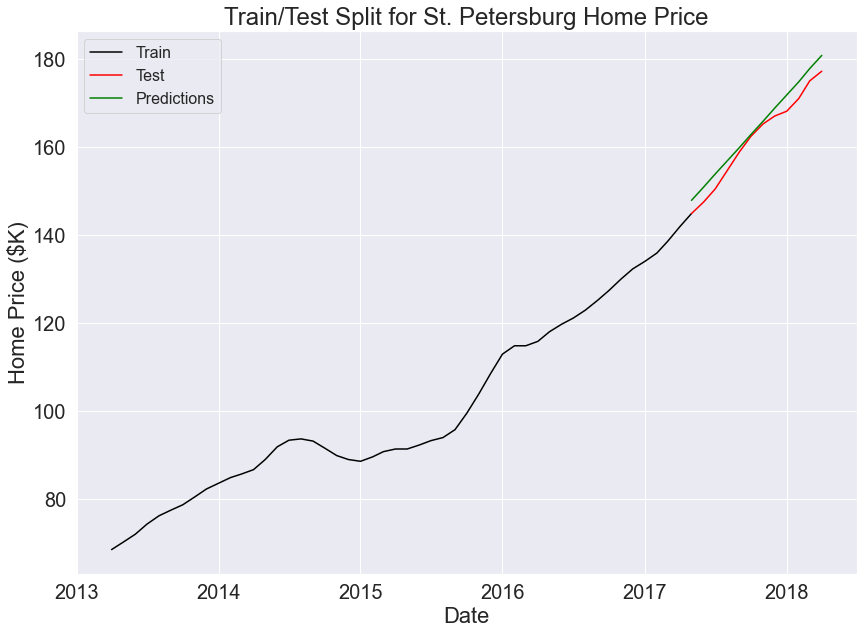

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,10))

plt.plot(train/1000, color = "black",label='Train')
plt.plot(test/1000, color = "red",label='Test')
plt.plot(y_pred_out/1000, color='green', label = 'Predictions')

plt.ylabel('Home Price ($K)', fontsize=22)
plt.xlabel('Date', fontsize=22)
plt.title("Train/Test Split for St. Petersburg Home Price", fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=16);

Forecasted percent return in 2019: 20.06%
Forecasted percent return in 2021: 42.29%
Forecasted percent return in 2023: 64.52%


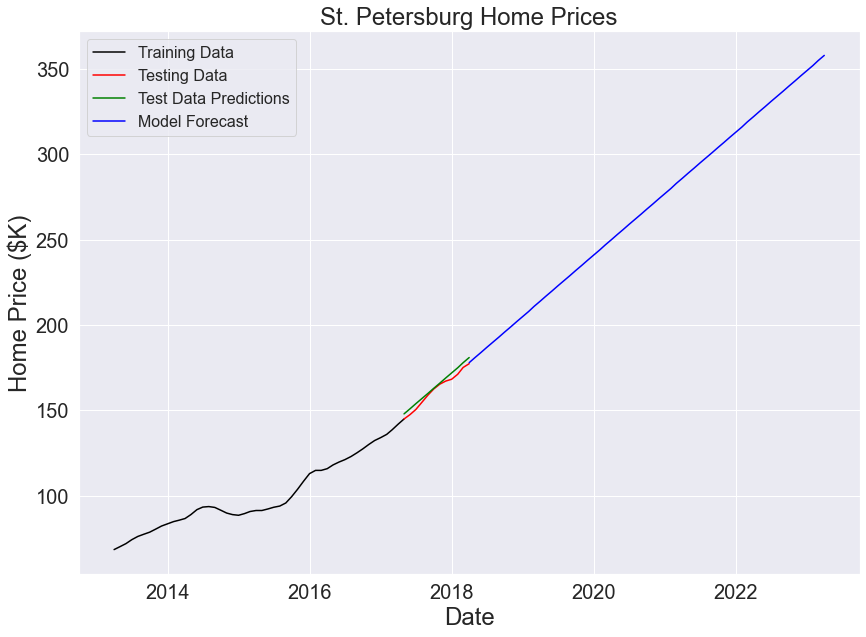

In [97]:
output = ar_1.predict(start='2018-04-01',end='2023-04-01')

import seaborn as sns
sns.set(font_scale = 1)

plt.figure(figsize=(14,10))
plt.plot(train/1000, color = "black",label='Training Data')
plt.plot(test/1000, color = "red",label='Testing Data')
plt.ylabel('Home Price ($K)', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("St. Petersburg Home Prices", fontsize=24)
plt.plot(y_pred_out/1000, color='green', label = 'Test Data Predictions')
plt.plot(output/1000, color='blue', label = 'Model Forecast')
plt.legend(fontsize=16);

pred1 = (np.mean(output[:12]))
pred3 = (np.mean(output[:36]))
pred5 = (np.mean(output[:60]))
actual = test['home price'].mean()
change1 = ((pred1-actual)/actual) * 100
change3 = ((pred3-actual)/actual) * 100
change5 = ((pred5-actual)/actual) * 100

print(f'Forecasted percent return in 2019: {round(change1, 2)}%')
print(f'Forecasted percent return in 2021: {round(change3, 2)}%')
print(f'Forecasted percent return in 2023: {round(change5, 2)}%')

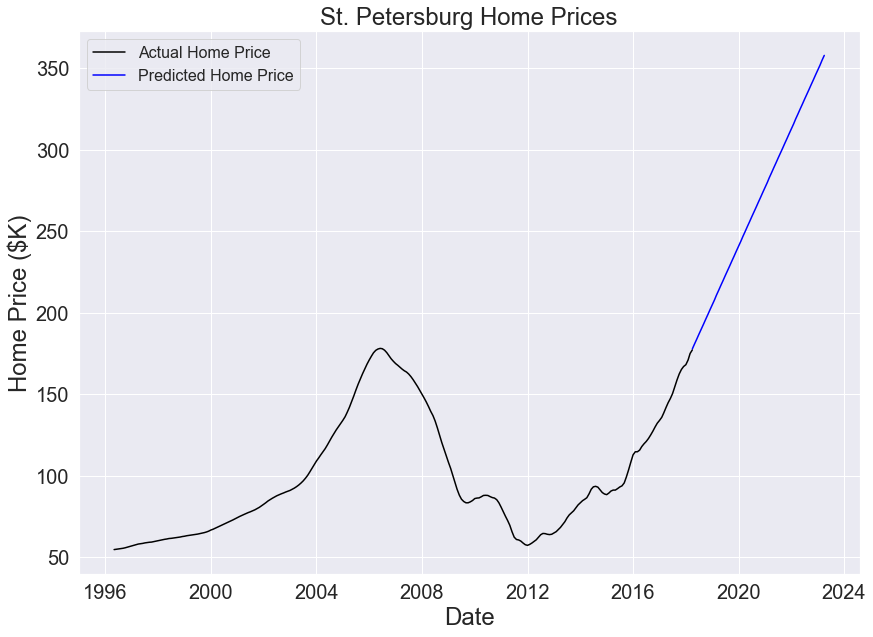

In [99]:
graph = lake_worth['home price']

plt.figure(figsize=(14,10))
plt.plot(graph/1000, color = "black",label='Actual Home Price')
plt.plot(output/1000, color='blue', label = 'Predicted Home Price')
plt.ylabel('Home Price ($K)', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("St. Petersburg Home Prices", fontsize=24)
plt.legend(fontsize=16);

In [83]:
x = ['St. Petersburg', 'Nashville', 'Denver', 'Pittsburgh', 'New York City']
y1 = np.array((20.06, 14.74, 10.69, 5.41, 0))
y3 = np.array((42.29, 31.50, 21.69, 13.93, 0))
y5 = np.array((64.52, 48.25, 32.69, 22.44, 0))
y0 = np.array((0, 0, 0, 0, 0,))

In [84]:
# create DataFrame
df_graph = pd.DataFrame({'1-Year ROI': [20.06, 14.74, 10.69, 5.41, 0],
                   '3-Year ROI': [42.29, 31.50, 21.69, 13.93, 0],
                   '5-Year ROI': [64.52, 48.25, 32.69, 22.44, 0]},
                  index=['St. Petersburg', 'Nashville', 'Denver', 'Pittsburgh', 'New York City'])

In [85]:
df_graph

,1-Year ROI,3-Year ROI,5-Year ROI
St. Petersburg,20.06,42.29,64.52
Nashville,14.74,31.50,48.25
Denver,10.69,21.69,32.69
Pittsburgh,5.41,13.93,22.44
New York City,0.00,0.00,0.00


In [86]:
df_graph.index

Index(['St. Petersburg', 'Nashville', 'Denver', 'Pittsburgh', 'New York City'], dtype='object')

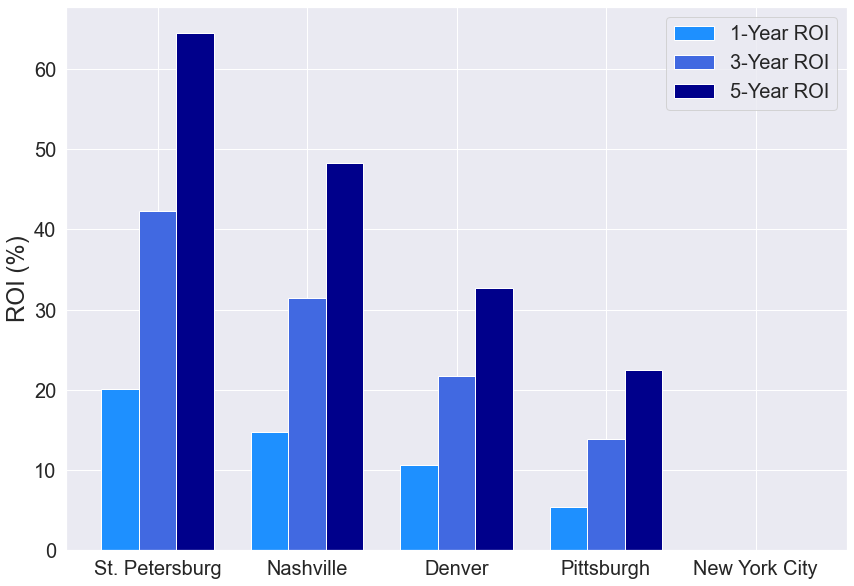

In [87]:
plt.figure(figsize=(14,10))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [20.06, 14.74, 10.69, 5.41, 0]
bars2 = [42.29, 31.50, 21.69, 13.93, 0]
bars3 = [64.52, 48.25, 32.69, 22.44, 0]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='dodgerblue', width=barWidth, edgecolor='white', label='1-Year ROI')
plt.bar(r2, bars2, color='royalblue', width=barWidth, edgecolor='white', label='3-Year ROI')
plt.bar(r3, bars3, color='darkblue', width=barWidth, edgecolor='white', label='5-Year ROI')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], x)

plt.ylabel('ROI (%)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16);
 
# Create legend & Show graphic
plt.legend(fontsize=20)
plt.show()